In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from collections import Counter
# Here used in outlier detection, to count how many times it has been listed.

In [0]:
# Importing data from local machine
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [0]:
# !pip uninstall sklearn -y
# !pip install Cython
# !pip install https://github.com/Santosh-Gupta/scikit-learn/archive/master.zip

In [0]:
# Handling missing values using MEAN, by using SimpleImputer for NaN
# Outlier Detection
def detect_outliers(df,n,features):
    outlier_indices =[]
    for i, col in enumerate(features):
      # 1st Quartile --> 25%
      Q1 = np.percentile(df_train[col],25)
      # print("Q1",Q1)
      Q3 = np.percentile(df[col],75)
      # print("Q3",Q3)
      # InterQuartile Range
      IQR = Q3 - Q1
      # Outlier step - Outlier within 1.5 * IQR
      outlier_step = 1.5*IQR
      outlier_list_col = df_train[(df_train[col] < (Q1 - outlier_step)) | (df_train[col] > (Q3 + outlier_step))].index
      outlier_indices.extend(outlier_list_col) # Add onto the same list
    
    outlier_indices = Counter(outlier_indices)
    # Counts the outlier, so we just ones which are repeated more than 3 times.
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    # Drop those outliers
    return multiple_outliers

Outliers_to_drop = detect_outliers(df_train,2,["Age","SibSp","Parch","Fare"])


In [0]:
# Drop these outliers
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [0]:
# Joining the train and test dataset so that it will be helpful during categorical conversion
# Length of the training set
train_len = len(df_train)
print(train_len)
dataset = pd.concat(objs=[df_train, df_test], axis=0 , sort=False).reset_index(drop=True) # Axis 0 appends rows as it is.
# reset_index = Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
# To prevent previous index being added as a new column we use drop=True


881


In [0]:
# Fill the NaN and null values with NaN
dataset = dataset.fillna(np.nan)

In [0]:
# Below are some functions that can be used to describe dataframes
dataset.describe()
dataset.isnull().sum()
df_train.isnull().sum()
df_train.dtypes
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


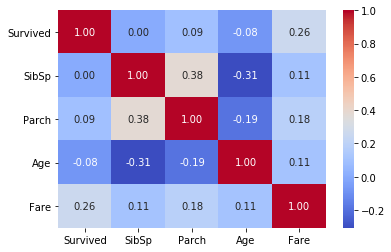

In [0]:
# Plotting graphs and checking the relations between the features
# Co-relation matrix, and co-relation is how the attribures are related varies from +1 to -1
# -1 --> one increases other decreases Strongly, 0 no effect, +1 one increases other increases Strongly
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived
# Use, corr()

cr_map = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


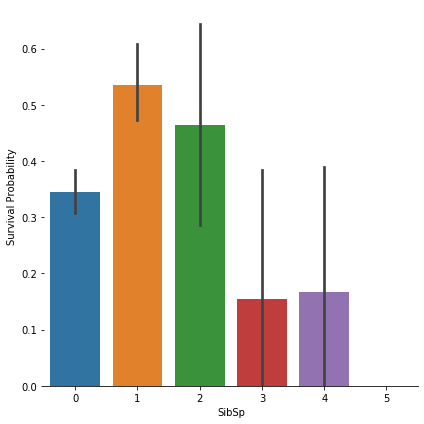

In [0]:
# How Siblings and Spouse affect the survival rate
sibsp_sur = sns.catplot(x="SibSp",y="Survived",data=df_train,kind="bar", size = 6)
sibsp_sur.despine(left=True)
# Remove the top and right spines from plot(s).
sibsp_sur = sibsp_sur.set_ylabels("Survival Probability")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


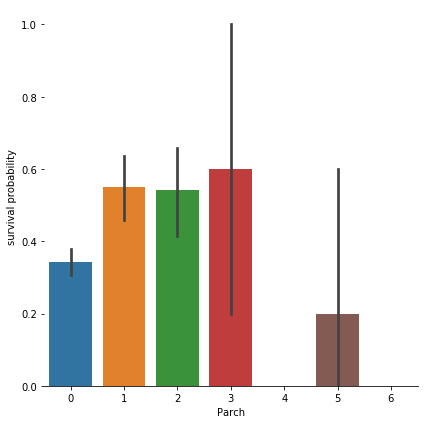

In [0]:
# Explore Parent and children feature vs Survived
parch_sur= sns.factorplot(x="Parch",y="Survived",data=df_train,kind="bar", size = 6)
parch_sur.despine(left=True)
parch_sur = parch_sur.set_ylabels("survival probability")

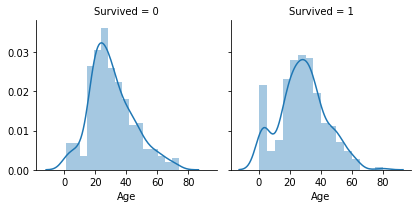

In [0]:
'''
Lets check for age now, even though we know Age correlation with survival is "almost" 0, we can find some information, but not much
as it doesnt have much affect.
'''
age_sur = sns.FacetGrid(df_train, col='Survived') # Displays empty graph. We have to map it against what we are checking
age_sur = age_sur.map(sns.distplot,"Age")
# age_sur = age_sur.map(sns.catplot,"Age")
# Age of 40 have survived and also have no survived, so not much information, but observer the small peak in sur=1 for young people


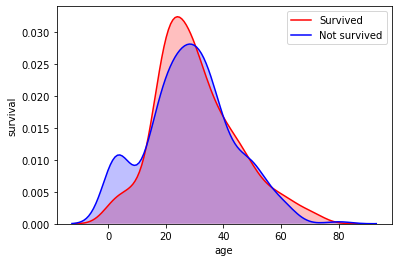

In [0]:
# Lets map it to check the peak.
# Kdeplot(data1 data2, other arguments)
#, color="Red", shade = True)
age_sur_peak = sns.kdeplot(df_train["Age"] [(df_train["Survived"] == 0) & (df_train["Age"].notnull())],color="Red", shade=True)
age_sur_peak = sns.kdeplot(df_train["Age"] [(df_train["Survived"] == 1) & (df_train["Age"].notnull())],color="Blue", shade=True)
age_sur_peak.set_xlabel("age")
age_sur_peak.set_ylabel("survival")
age_sur_peak = age_sur_peak.legend(["Survived", "Not survived"])

In [0]:
# Fare
dataset["Fare"].isnull().sum()
# Has only 1 missing value so fill it with median, it wont have an effect
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())


In [0]:
dataset["Fare"].skew() # Checking the skewness of the data

4.511862011583735

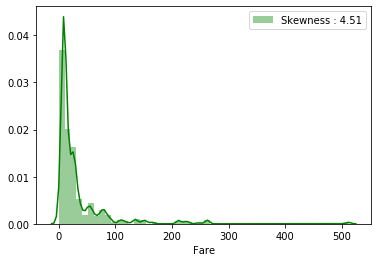

In [0]:
# All the values of fare are skewed to one side, so reduce skewness
fare_v = sns.distplot(dataset["Fare"], color="Green", label="Skewness : %.2f"%(dataset["Fare"].skew()))
fare_v = fare_v.legend(loc="best")

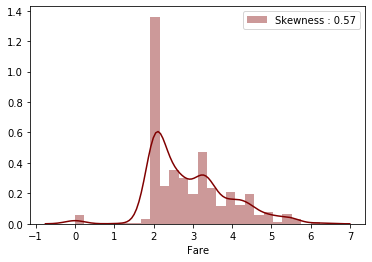

In [0]:
# Reduce skewness by using log function
dataset["Fare"] = dataset["Fare"].map(lambda i : np.log(i) if i>0 else 0)
dataset["Fare"].skew()
fare_lv = sns.distplot(dataset["Fare"], color="Maroon", label="Skewness : %.2f"%(dataset["Fare"].skew()))
fare_lv = fare_lv.legend(loc="best")


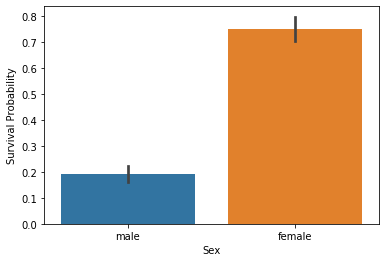

In [0]:
# Categorizing Categorical values
# Lets look at how what's the probability of M/F surviving
g = sns.barplot(x="Sex",y="Survived",data=df_train)
g = g.set_ylabel("Survival Probability")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


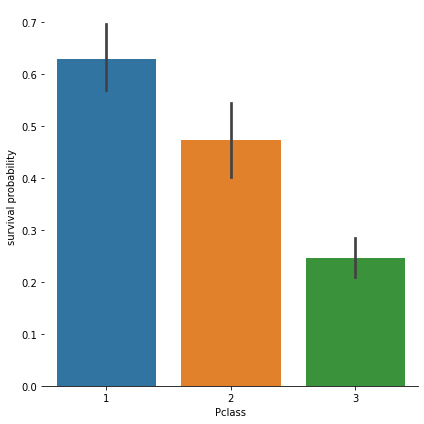

In [0]:
# How the Pclass affected the survival probability??????
pcl_sur = sns.catplot(x="Pclass",y="Survived",data=df_train,kind="bar", size = 6)
pcl_sur.despine(left=True)
pcl_sur = pcl_sur.set_ylabels("survival probability")
# so PClass 1 has higher chances of survival

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


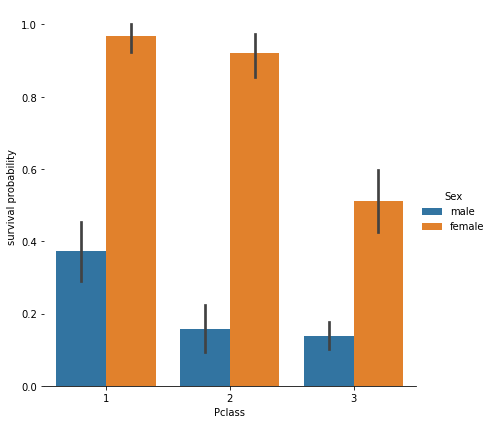

In [0]:
# Classifying Male/Female data wrt to Pclass for survival probability
pcl_sur_sex = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df_train, size=6, kind="bar")
# Hue separates based on the value specified
pcl_sur_sex.despine(left=True)
pcl_sur_sex = pcl_sur_sex.set_ylabels("survival probability")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


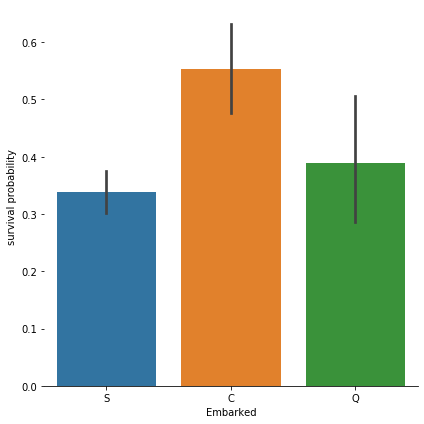

In [0]:
dataset["Embarked"].isnull().sum()
#Fill Embarked "nan" values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")
# How embarkation affected the survival rate??
em_sur = sns.catplot(x="Embarked", y = "Survived", data=df_train, size=6, kind='bar')
em_sur.despine(left=True)
em_sur = em_sur.set_ylabels('survival probability') # Setting y label

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


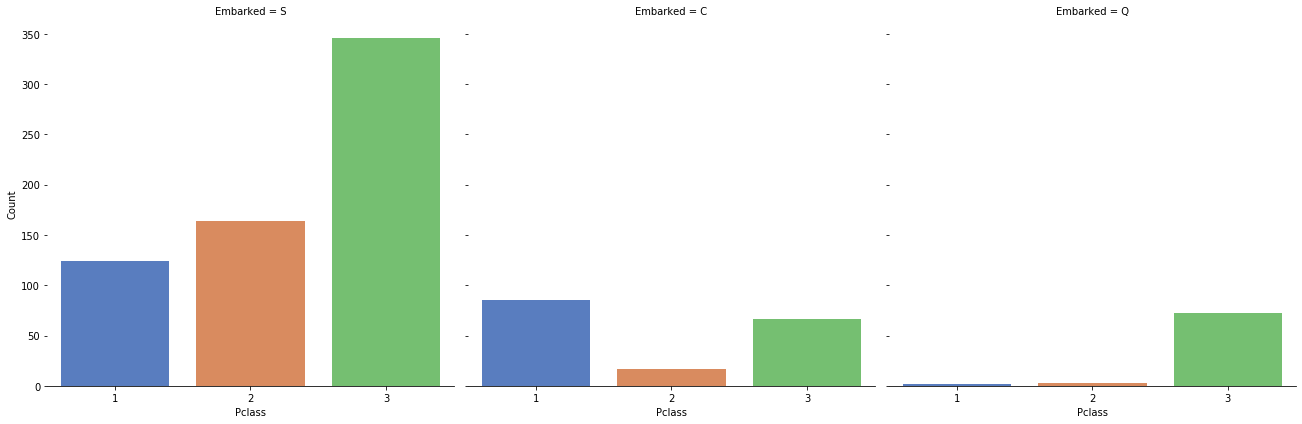

In [0]:
g = sns.catplot("Pclass", col="Embarked", data=df_train, size=6, kind="count", palette="muted") # Hue is the p class
g.despine(left=True)
g = g.set_ylabels("Count")

In [0]:
# Handling Missing values for age,since there are 256 of 'em
dataset['Age'].isnull().sum()


256

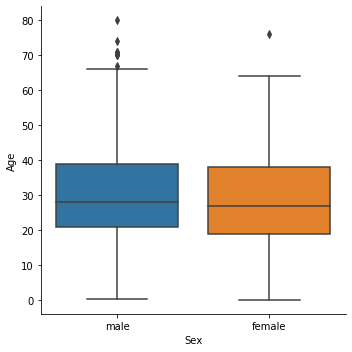

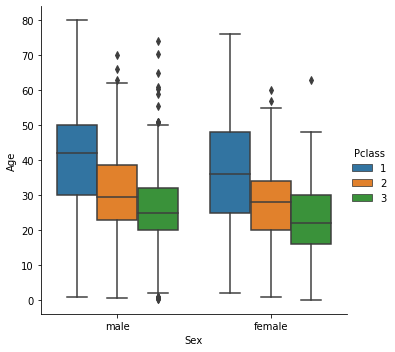

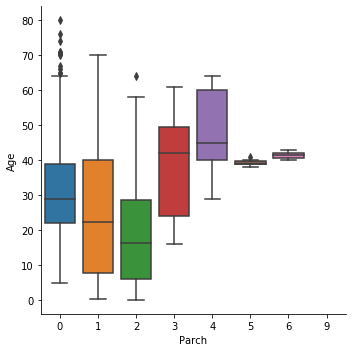

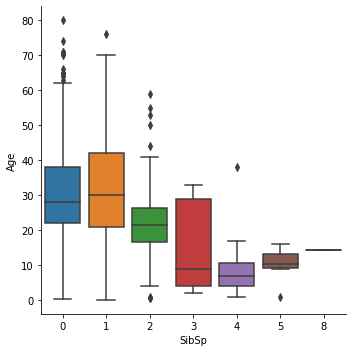

In [0]:
# What's the values of age for M/F 
g = sns.catplot(y="Age",x="Sex",data=dataset,kind="box")
# with hue as Pclass
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind= "box")
g = sns.catplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.catplot(y="Age",x="SibSp", data=dataset,kind="box")

However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.
Moreover, the more a passenger has parents/children the older he is and 
the more a passenger has siblings/spouses the younger he is.

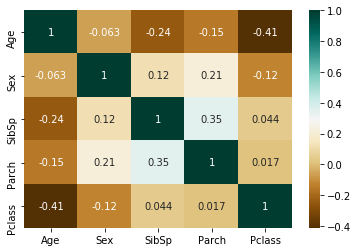

In [0]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})
# However there is no relation between Age and Sex. It tells Pclass has higher survival, but old people are in P1, but we know young people have high survival rate
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [0]:
# Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)
# Dataset[something][wrt this condition] in the same column
for i in index_NaN_age:
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        dataset['Age'].iloc[i] = age_pred
    else:
        dataset['Age'].iloc[i] = age_med

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
dataset["Age"].isnull().sum()
# 0 -- all values filled

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


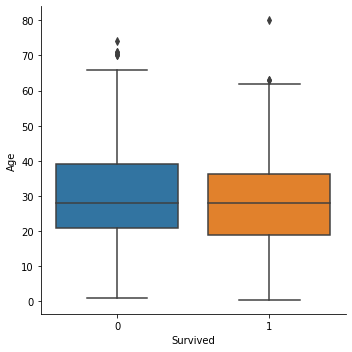

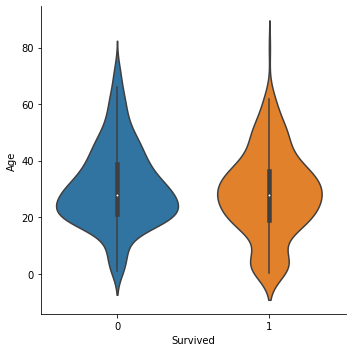

In [0]:
g = sns.factorplot(x="Survived", y = "Age",data = df_train, kind="box")
g = sns.factorplot(x="Survived", y = "Age",data = df_train, kind="violin")

We can see survived has little bulge at the bottom, This shows the survival of young people

In [0]:
# Feature Engineering
dataset["Name"].head()
#May be titles have something to do with survival??

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
# List
dataset_title = [str(i.split(",")[1].split(".")[0].strip()) for i in dataset["Name"]]
# Convert to Pandas Dataframe
dataset['Title'] = pd.Series(dataset_title)
dataset['Title'].head()


0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: object

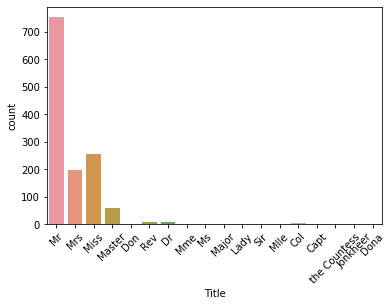

In [0]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) # To make title visible and more readable
dataset["Title"]

In [0]:
# We can see "Mr" has more values, but most of them have very little. So we can group them into one
# dataset = dataset.replace(to_replace="Dona", value="Rare")
# dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms": 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
# dataset["Title"] = dataset["Title"].astype(int)
dataset['Title'] = dataset.Title.str.replace('Dona', 'Rare')
dataset['Title'] = dataset.Title.str.replace('the Countess', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Countess', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Capt', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Col', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Don', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Dr', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Major', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Rev', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Sir', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Jonkheer', 'Rare')
dataset['Title'] = dataset.Title.str.replace('Lady', 'Rare')
# Replace --> ['Lady', 'the Countess' ,'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

recode_title = {"Master":'0', "Miss":'1', "Ms": '1' , "Mme":'1', "Mlle":'1', "Mrs":'1', "Mr":'2', "Rare":'3'}
dataset["Title"]


0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Rare
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: object

In [0]:
# dataset["Title"] = dataset["Title"].replace(recode_title)
dataset["Title"] = dataset["Title"].map({"Master":'0', "Miss":'1', "Ms": '1' , "Mme":'1', "Mlle":'1', "Mrs":'1', "Mr":'2', "Rare":'3'})
dataset["Title"]
# Can write lambda or dictionary inside a map function


0       2
1       1
2       1
3       1
4       2
       ..
1294    2
1295    3
1296    2
1297    2
1298    0
Name: Title, Length: 1299, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


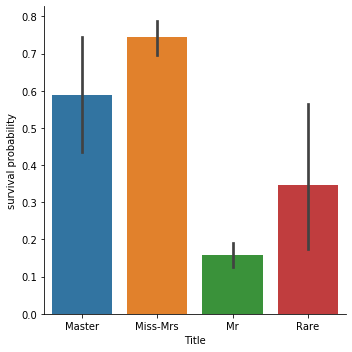

In [0]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [0]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True) # Column will be dropped

In [0]:
# How overall family size affects the survival
# Create a family size descriptor from SibSp and Parch
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


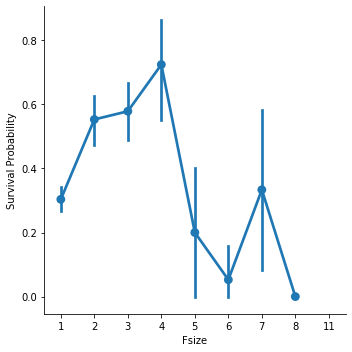

In [0]:
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

In [0]:
# Probability decreases with the increase in Fsize
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if s == 2 else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda y:1 if y>5 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

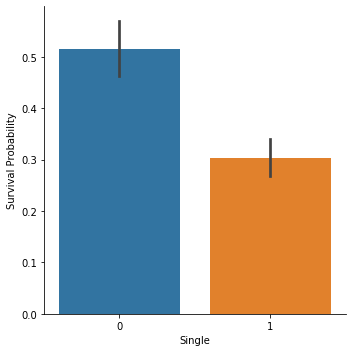

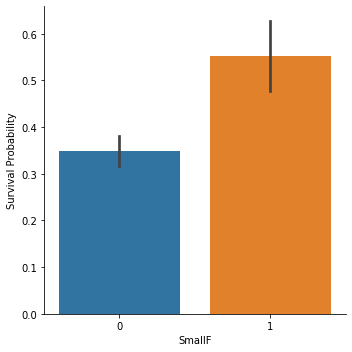

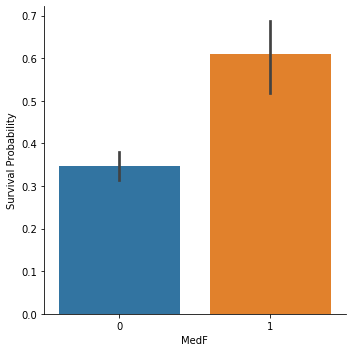

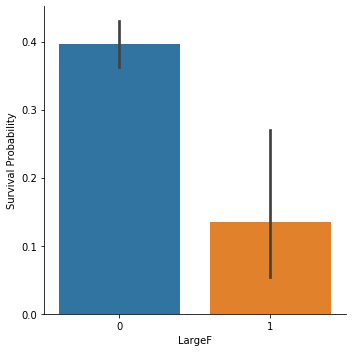

In [0]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em") # Adds the prefix at the start of the actual prefix

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Title"]) # Get dummies another way of doing one hot encoding, then we can drop that column

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fsize,Single,SmallF,MedF,LargeF,Em_C,Em_Q,Em_S,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,2,0,1,0,0,0,0,1,0,0,1,0
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,2,0,1,0,0,1,0,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1,1,0,0,0,0,0,1,0,1,0,0
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,2,0,1,0,0,0,0,1,0,1,0,0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,1,1,0,0,0,0,0,1,0,0,1,0


In [0]:
dataset["Cabin"].head()
dataset["Cabin"].describe()
# Just to check their count and unique values.

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [0]:
dataset["Cabin"].isnull().sum()
# As we can see, majority of them are NULL

1007

In [0]:
# Cabin number might give information about how cabin affected survival and what thos NaN values might represent. So use "First letter" of the Cabin, if NaN use X
dataset["Cabin"][dataset["Cabin"].notnull()].head()
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

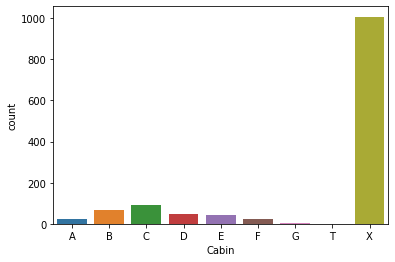

In [0]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X']) # Count plot, counts each occurences

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


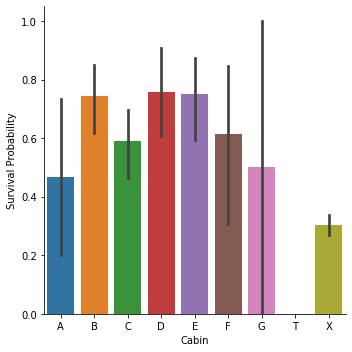

In [0]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
# can specify the order by using order attribute
g = g.set_ylabels("Survival Probability")
# Very less X -- probably no cabin has survived.

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin") # One hot encoding of the columns
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Fsize,Single,SmallF,MedF,LargeF,Em_C,Em_Q,Em_S,Title_0,Title_1,Title_2,Title_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,2,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [0]:
# Now lets analyze Ticket, it might give some information on cabin.
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X.
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
dataset["Ticket"] = Ticket
dataset["Ticket"].head()


0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [0]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [0]:
# Drop useless variables
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [0]:
dataset.head()
# Now we can see different passenger class after encoding as Pc_1,Pc_2,Pc_3

,Survived,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,MedF,LargeF,Em_C,Em_Q,Em_S,Title_0,Title_1,Title_2,Title_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,T_A,T_A4,T_A5,T_AQ3,T_AQ4,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_LP,T_PC,T_PP,T_PPP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0.0,0,22.0,1,0,1.981001,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,4.266662,2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,1,26.0,0,0,2.070022,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,3.972177,2,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0.0,0,35.0,0,0,2.085672,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
# Modeling
# Separate Train and Test data

train = dataset[:train_len]
test = dataset[train_len:] # We had earlier initialized a variable train_len before merging train and test.
test.drop(labels=["Survived"],axis = 1,inplace=True) # remove the column

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
# In training data, split Attributes and features
train["Survived"] = train["Survived"].astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
Y_train = train["Survived"]
X_train = train.drop(labels=["Survived"], axis=1)

In [0]:
'''
Will be using --> Support Vector Machines, K Nearest Neighbours, Random Forest Classifier, Decision Trees, AdaBoost(Stumps), Neural Networks(MLP)
                  Extra Tress classifier and Logistic Regression
Cross validation with 10 splits
'''
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [0]:
# Specify the split for cross validation
kfold = StratifiedKFold(n_splits=12)

# We want to compare those models, so better use same random state
random_state = 7

# Append all classfiers to a list, and loop through it for cross validation
classifiers = []

classifiers.append(SVC(random_state=random_state)) 
classifiers.append(DecisionTreeClassifier(random_state=random_state)) 
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)) 
classifiers.append(RandomForestClassifier(random_state=random_state)) 
classifiers.append(ExtraTreesClassifier(random_state=random_state)) 
classifiers.append(MLPClassifier(random_state=random_state)) 
classifiers.append(KNeighborsClassifier()) 
classifiers.append(LogisticRegression(random_state = random_state))

# So the classifier list contains a list of CLASSIFICATION ALGORITHM OBJECTS



In [0]:
# Run cross validation on all of these and compare the mean accuracy of these classification and select the best models for training
# Cross validation helps in model selection
cross_validation_means = []
cross_validation_std = []
cross_validation_results = []

for classifier in classifiers:
    cross_validation_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))


In [0]:
# Results from cross validation
cross_validation_results
# We usually, take error and take mean over all of them, to get large data for cross validation
# So, now we have list of arrays, each having the accuracy score, so take mean of them instead

[array([0.7027027 , 0.64864865, 0.7027027 , 0.77027027, 0.74324324,
        0.69863014, 0.71232877, 0.75342466, 0.69863014, 0.75342466,
        0.80821918, 0.7260274 ]),
 array([0.7027027 , 0.78378378, 0.83783784, 0.7972973 , 0.82432432,
        0.80821918, 0.84931507, 0.79452055, 0.80821918, 0.83561644,
        0.8630137 , 0.8630137 ]),
 array([0.72972973, 0.7972973 , 0.74324324, 0.7972973 , 0.85135135,
        0.78082192, 0.83561644, 0.79452055, 0.80821918, 0.78082192,
        0.87671233, 0.83561644]),
 array([0.78378378, 0.7972973 , 0.7972973 , 0.77027027, 0.86486486,
        0.80821918, 0.8630137 , 0.83561644, 0.78082192, 0.78082192,
        0.83561644, 0.83561644]),
 array([0.74324324, 0.75675676, 0.75675676, 0.81081081, 0.85135135,
        0.79452055, 0.84931507, 0.8630137 , 0.78082192, 0.73972603,
        0.82191781, 0.8630137 ]),
 array([0.7972973 , 0.7972973 , 0.83783784, 0.7972973 , 0.85135135,
        0.79452055, 0.78082192, 0.83561644, 0.79452055, 0.82191781,
        0.8630

In [0]:
for cross_v_result in cross_validation_results:
    cross_validation_means.append(cross_v_result.mean()) 
    cross_validation_std.append(cross_v_result.std())

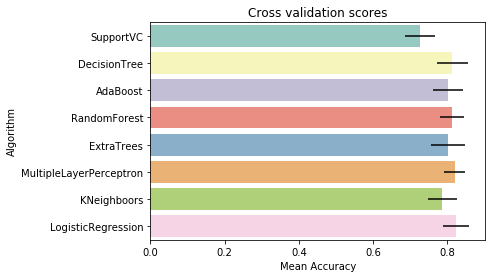

In [0]:
# Plot the graph, to check the accuracy of each model and then select the best among them
# Create a new data frame, pass a dictionary, for pandas DataFrame
cv_res = pd.DataFrame({"CrossValMeans":cross_validation_means,"CrossValerrors": cross_validation_std,"Algorithm":["SupportVC","DecisionTree","AdaBoost", "RandomForest","ExtraTrees","MultipleLayerPerceptron","KNeighboors","LogisticRegression"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette= "Set3",orient = "h",**{'xerr':cross_validation_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [0]:
# So, let's take --> Decision Trees, RandomForest, MultipleLayerPerceptron, Logistic Regression and AdaBoost
# HyperParameter Tuning GridSearchCV
# Decision Trees
DTC = DecisionTreeClassifier()
# GridSearch perform a local search and finds out the best parameters that has to be used, however initial values has to specified by the user
decisionT_param_grid = {"max_depth": [None], 
                        "max_features": [1, 5, 10], 
                        "min_samples_split": [2, 3, 10], 
                        "min_samples_leaf": [1, 3, 10],   
                        "criterion": ["gini","entropy"]
                         }
gsDTC = GridSearchCV(DTC,param_grid = decisionT_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsDTC.fit(X_train,Y_train)

Fitting 12 folds for each of 54 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:    2.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
       

In [0]:
gsDTC.best_estimator_
# Accuracy score is of the GSearch and not of the model.
print("Accuracy of the search", gsDTC.best_score_)

Accuracy of the search 0.8184468715290633


In [0]:
gsDTC.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [0]:
gsDTC_best_settings = gsDTC.best_estimator_


In [0]:
# Random Forest
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None], 
                 "max_features": [1, 3, 5, 10], 
                 "min_samples_split": [2, 3, 10], 
                 "min_samples_leaf": [1, 3, 10], 
                 "bootstrap": [False,True], 
                 "n_estimators" :[100,300], 
                 "criterion": ["gini","entropy"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train,Y_train)


Fitting 12 folds for each of 288 candidates, totalling 3456 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 14.6min
[Parallel(n_jobs=4)]: Done 3456 out of 3456 | elapsed: 16.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=4,
         

In [0]:
gsRFC.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [0]:
gsRFC.best_score_

0.8343360483771444

In [0]:
# AdaBoost
DTCAB = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTCAB, random_state=7)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy" ],
                  "base_estimator__splitter" : ["best", "random"], 
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)

Fitting 12 folds for each of 112 candidates, totalling 1344 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 1337 out of 1344 | elapsed:   15.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 1344 out of 1344 | elapsed:   15.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                           

In [0]:
gsadaDTC.best_params_


{'algorithm': 'SAMME.R',
 'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.1,
 'n_estimators': 2}

In [0]:
gsadaDTC.best_score_

0.8163026039738367

In [0]:
# Multiple Layer Perceptron
MLP = MLPClassifier()
# GridSearch perform a local search and finds out the best parameters that has to be used, however initial values has to specified by the user
MLP_param_grid = {"learning_rate": ["constant", "adaptive"], 
                  "activation": ["logistic","relu","Tanh"], 
                  "hidden_layer_sizes": [(10,20,30),(5,10,15)],
                  "alpha":[0.0001,0.001]
                  }
gsMLP = GridSearchCV(MLP,param_grid = MLP_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsMLP.fit(X_train,Y_train)

Fitting 12 folds for each of 24 candidates, totalling 288 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed:  1.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'alpha': [0.

In [0]:
gsMLP.best_score_

0.8274558805380724

In [0]:
gsMLP.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 20, 30),
 'learning_rate': 'constant'}

In [0]:
# Logistic Regression
LR = LogisticRegression()
# GridSearch perform a local search and finds out the best parameters that has to be used, however initial values has to specified by the user
LR_param_grid = {"C": [0.001,0.01,0.1,1,10,10,100], 
                  "penalty": ["l1","l2"], 
                  }
gsLR = GridSearchCV(LR,param_grid = LR_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsLR.fit(X_train,Y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 12 folds for each of 14 candidates, totalling 168 fits


[Parallel(n_jobs=4)]: Done 151 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 168 out of 168 | elapsed:    3.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [0]:
gsLR.best_score_

0.8240312230038258

In [0]:
gsLR.best_params_

{'C': 1, 'penalty': 'l2'}

In [0]:
gsLR_best_settings = gsLR.best_estimator_
gsRF_best_settings = gsRFC.best_estimator_
gsADA_best_settings = gsadaDTC.best_estimator_
gsMLP_best_settings = gsMLP.best_estimator_

In [0]:
test_Survived_DTC = pd.Series(gsDTC_best_settings.predict(test), name="DTC") 
test_Survived_RF = pd.Series(gsRF_best_settings.predict(test), name="RFC" )
test_Survived_Ada = pd.Series(gsADA_best_settings.predict(test), name="Ada") 
test_Survived_MLP = pd.Series(gsMLP_best_settings.predict(test), name="MLP") 
test_Survived_LR = pd.Series(gsLR_best_settings.predict(test), name="LR")

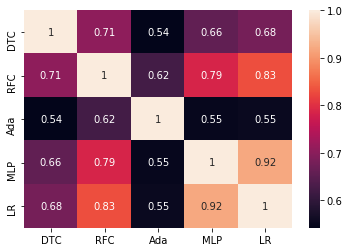

In [0]:
ensemble_results = pd.concat([test_Survived_DTC,test_Survived_RF, test_Survived_Ada,test_Survived_MLP, test_Survived_LR],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
# This shows how each model's output is related to others, like LR's prediction is similar to Multi layer perceptron
# Choosing voting classifier to combine the models

votingC = VotingClassifier(estimators=[('dfc', gsDTC_best_settings), ('rf', gsRF_best_settings),('ada', gsADA_best_settings), ('mlp',gsMLP_best_settings),('lr',gsLR_best_settings)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, Y_train)

In [0]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")
IDtest = df_test["PassengerId"]
results = pd.concat([IDtest,test_Survived],axis=1)

In [0]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
